## **ANALYSIS OF CUSLTERING TECHNIQUES ON CUSTOMER DATA**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('/content/drive/MyDrive/dataset/train_mall.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
# Select the attributes to use for clustering
attributes = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']
X = df[attributes]

In [5]:
Profession = {
    'Healthcare':1,'Engineer':2,'Lawyer':3,'Entertainment':4, 'Artist':5,
       'Executive':6, 'Doctor':7, 'Homemaker':8, 'Marketing':8
}
df['Profession'] = df['Profession'].map(Profession)

var = {
    'Cat_4':4, 'Cat_6':6, 'Cat_7':7, 'Cat_3':3, 'Cat_1':1, 'Cat_2':2, 'Cat_5':5
}
df['Var_1'] = df['Var_1'].map(var)

Graduate = {
    'No':0, 'Yes':1
}
df['Graduated']=df['Graduated'].map(Graduate)

married = {
    'No':0, 'Yes':1
}
df['Ever_Married']=df['Ever_Married'].map(married)

gender = {
    'Male':0, 'Female':1
}
df['Gender'] = df['Gender'].map(gender)

spending ={
    'Low':0, 'Average':1, 'High':2
}
df['Spending_Score']=df['Spending_Score'].map(spending)

segu = {
    'D':4, 'A':0, 'B':1, 'C':2
}
df['Segmentation']=df['Segmentation'].map(segu)

In [6]:
df= df.drop('ID',axis=1)
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,1.0,1.0,0,4.0,4.0,4
1,1,1.0,38,1.0,2.0,NaN,1,3.0,4.0,0
2,1,1.0,67,1.0,2.0,1.0,0,1.0,6.0,1
3,0,1.0,67,1.0,3.0,0.0,2,2.0,6.0,1
4,1,1.0,40,1.0,4.0,NaN,2,6.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,0,7.0,1.0,4
8064,0,0.0,35,0.0,6.0,3.0,0,4.0,4.0,4
8065,1,0.0,33,1.0,1.0,1.0,0,1.0,6.0,4
8066,1,0.0,27,1.0,1.0,1.0,0,4.0,6.0,1


In [7]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

preprocess the dataset for null value

In [8]:
from sklearn.impute import SimpleImputer
# Create a SimpleImputer object
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the DataFrame
imputer.fit(df)

# Transform the DataFrame
imputed_df = imputer.transform(df)

# Convert the imputed DataFrame to a Pandas DataFrame
df = pd.DataFrame(imputed_df, columns=df.columns)

In [9]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.0,0.0,22.0,0.0,1.000000,1.000000,0.0,4.0,4.0,4.0
1,1.0,1.0,38.0,1.0,2.000000,2.641663,1.0,3.0,4.0,0.0
2,1.0,1.0,67.0,1.0,2.000000,1.000000,0.0,1.0,6.0,1.0
3,0.0,1.0,67.0,1.0,3.000000,0.000000,2.0,2.0,6.0,1.0
4,1.0,1.0,40.0,1.0,4.000000,2.641663,2.0,6.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8063,0.0,0.0,22.0,0.0,4.240811,0.000000,0.0,7.0,1.0,4.0
8064,0.0,0.0,35.0,0.0,6.000000,3.000000,0.0,4.0,4.0,4.0
8065,1.0,0.0,33.0,1.0,1.000000,1.000000,0.0,1.0,6.0,4.0
8066,1.0,0.0,27.0,1.0,1.000000,1.000000,0.0,4.0,6.0,1.0


In [10]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [11]:
# Normalize the data
X = (df - df.mean()) / df.std()

K-Means Clutering

In [12]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


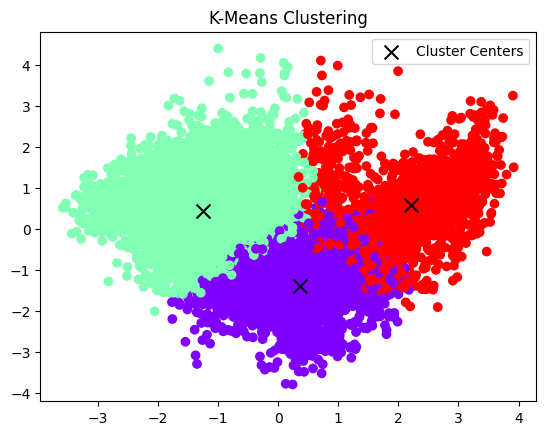

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Transform the cluster centers using PCA
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# Plot the data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')

# Plot the cluster centers
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [14]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


K MEDOID

In [15]:
from sklearn_extra.cluster import KMedoids

In [16]:
# Perform K-Medoids clustering
kmedoids_instance = KMedoids(n_clusters=3, random_state=42)
kmedoids_instance.fit(X)

KMedoids(n_clusters=3, random_state=42)

In [17]:
# Get the cluster labels
labels = kmedoids_instance.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


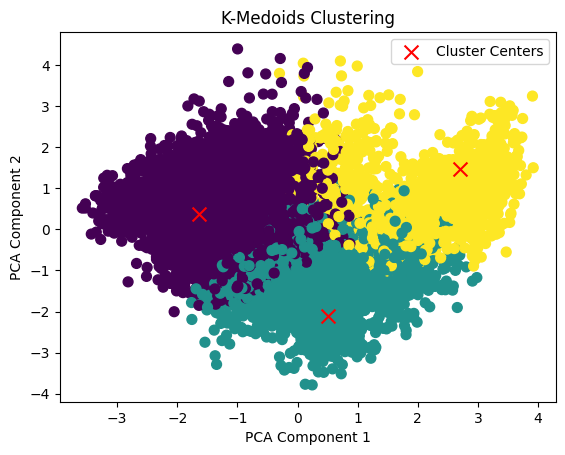

In [18]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(X)

# Transform the cluster centers using PCA
cluster_centers_2d = pca.transform(kmedoids_instance.cluster_centers_)

# Plot the scatterplot
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmedoids_instance.labels_, cmap='viridis', marker='o', s=50)

# Plot the cluster centers
plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

### HIRERICAL CLUSTERING

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [21]:
# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([8067, 4180, 7133, ...,    6,    2,    0])

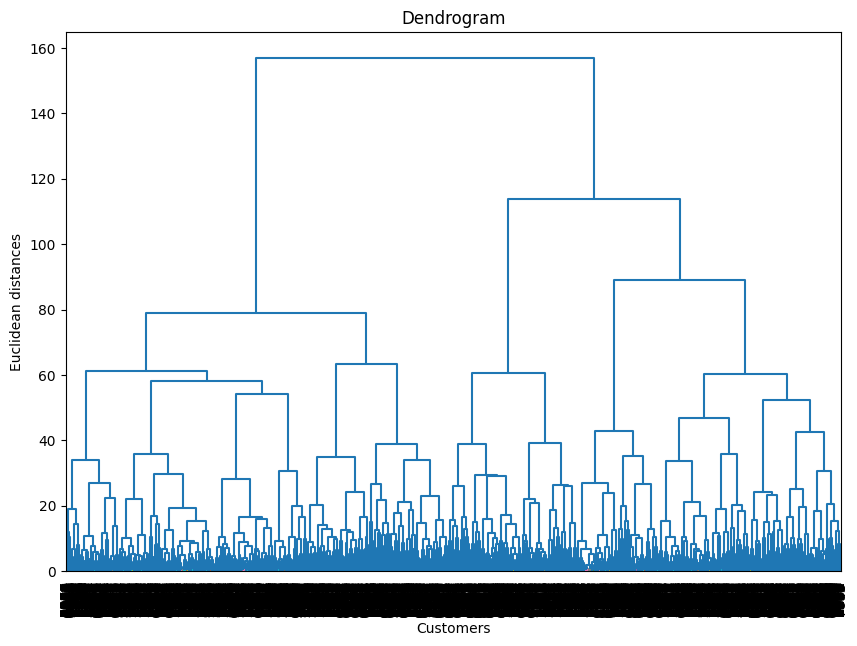

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage(data_scaled, method='ward'),color_threshold=0.8,leaf_rotation=90, leaf_font_size=10,
           show_contracted=True)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [23]:
# Choose an appropriate number of clusters based on the dendrogram
num_clusters = 3

In [24]:
# Perform hierarchical clustering with the chosen number of clusters
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [25]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

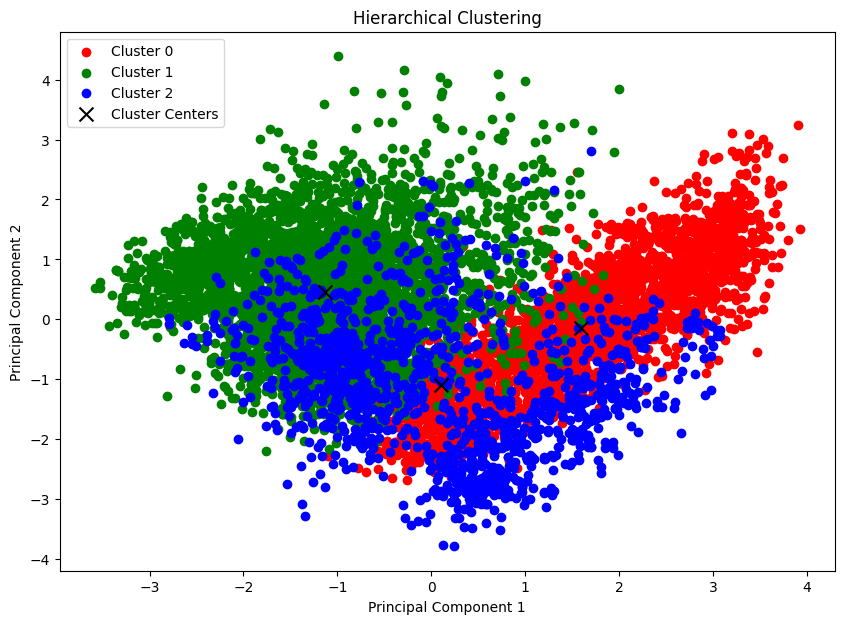

In [26]:
# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
pca_df['Cluster'] = labels

# Calculate the centroids of each cluster
centroids = pca_df.groupby('Cluster').mean()

# Plot the scatter plot
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(len(centroids)):
    plt.scatter(pca_df.loc[pca_df['Cluster'] == i, 'principal component 1'],
                pca_df.loc[pca_df['Cluster'] == i, 'principal component 2'],
                c=colors[i], label=f'Cluster {i}')

# Plot the cluster centroids
plt.scatter(centroids['principal component 1'], centroids['principal component 2'], c='black', marker='x', s=100, label='Cluster Centers')

plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

COMPARISION OF 3 CLUSTERING ALGORITHMS

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

In [28]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/dataset/train_mall.csv")

In [29]:
# Preprocess the data
Profession = {
    'Healthcare':1,'Engineer':2,'Lawyer':3,'Entertainment':4, 'Artist':5,
       'Executive':6, 'Doctor':7, 'Homemaker':8, 'Marketing':8
}
data['Profession'] = data['Profession'].map(Profession)

var = {
    'Cat_4':4, 'Cat_6':6, 'Cat_7':7, 'Cat_3':3, 'Cat_1':1, 'Cat_2':2, 'Cat_5':5
}
data['Var_1'] = data['Var_1'].map(var)

Graduate = {
    'No':0, 'Yes':1
}
data['Graduated']=data['Graduated'].map(Graduate)

married = {
    'No':0, 'Yes':1
}
data['Ever_Married']=data['Ever_Married'].map(married)

gender = {
    'Male':0, 'Female':1
}
data['Gender'] = data['Gender'].map(gender)

spending ={
    'Low':0, 'Average':1, 'High':2
}
data['Spending_Score']=data['Spending_Score'].map(spending)

segu = {
    'D':4, 'A':0, 'B':1, 'C':2
}
data['Segmentation']=data['Segmentation'].map(segu)

In [30]:
data = data.drop('ID',axis=1)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,1.0,1.0,0,4.0,4.0,4
1,1,1.0,38,1.0,2.0,NaN,1,3.0,4.0,0
2,1,1.0,67,1.0,2.0,1.0,0,1.0,6.0,1
3,0,1.0,67,1.0,3.0,0.0,2,2.0,6.0,1
4,1,1.0,40,1.0,4.0,NaN,2,6.0,6.0,0


In [31]:
from sklearn.impute import SimpleImputer
# Create a SimpleImputer object
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer to the DataFrame
imputer.fit(data)

# Transform the DataFrame
imputed_df = imputer.transform(data)

# Convert the imputed DataFrame to a Pandas DataFrame
data = pd.DataFrame(imputed_df, columns=data.columns)

In [32]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.0,0.0,22.0,0.0,1.0,1.000000,0.0,4.0,4.0,4.0
1,1.0,1.0,38.0,1.0,2.0,2.641663,1.0,3.0,4.0,0.0
2,1.0,1.0,67.0,1.0,2.0,1.000000,0.0,1.0,6.0,1.0
3,0.0,1.0,67.0,1.0,3.0,0.000000,2.0,2.0,6.0,1.0
4,1.0,1.0,40.0,1.0,4.0,2.641663,2.0,6.0,6.0,0.0


In [33]:
# Choose an appropriate number of clusters
num_clusters = 5

In [34]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)
kmedoids_labels = kmedoids.fit_predict(data_scaled)

# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [35]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

In [36]:
# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
pca_df['KMeans'] = kmeans_labels
pca_df['KMedoids'] = kmedoids_labels
pca_df['Hierarchical'] = hierarchical_labels

In [37]:
# Transform the cluster centers using PCA
kmeans_centers_2d = pca.transform(kmeans.cluster_centers_)
kmedoids_centers_2d = pca.transform(kmedoids.cluster_centers_)

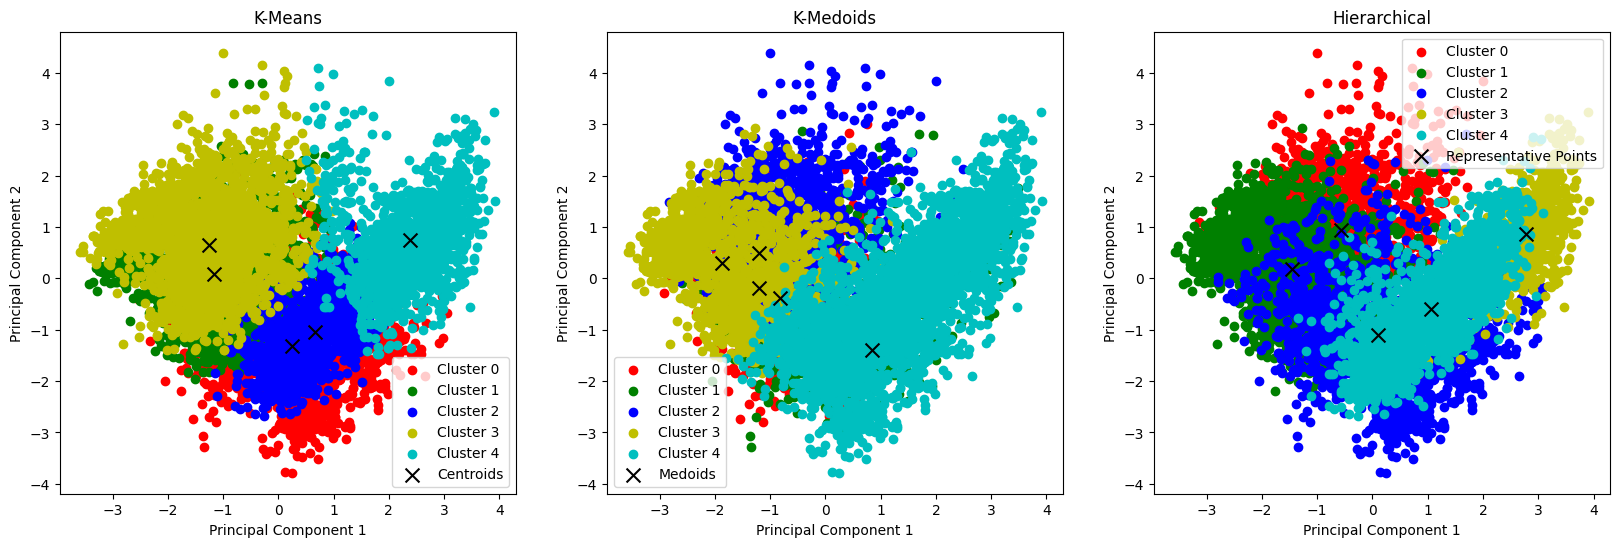

In [38]:
# Plot the scatter plots for each clustering algorithm
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
titles = ['K-Means', 'K-Medoids', 'Hierarchical']

for i, algorithm in enumerate(['KMeans', 'KMedoids', 'Hierarchical']):
    for j in range(num_clusters):
        axes[i].scatter(pca_df.loc[pca_df[algorithm] == j, 'principal component 1'],
                        pca_df.loc[pca_df[algorithm] == j, 'principal component 2'],
                        c=colors[j], label=f'Cluster {j}')
    if algorithm == 'KMeans':
        axes[i].scatter(kmeans_centers_2d[:, 0], kmeans_centers_2d[:, 1], c='black', marker='x', s=100, label='Centroids')
    elif algorithm == 'KMedoids':
        axes[i].scatter(kmedoids_centers_2d[:, 0], kmedoids_centers_2d[:, 1], c='black', marker='x', s=100, label='Medoids')
    elif algorithm == 'Hierarchical':
        for cluster in np.unique(hierarchical_labels):
            cluster_points = principal_components[hierarchical_labels == cluster]
            representative_point = cluster_points.mean(axis=0)
            axes[i].scatter(representative_point[0], representative_point[1], c='black', marker='x', s=100, label='Representative Points' if cluster == 0 else None)

    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Principal Component 1")
    axes[i].set_ylabel("Principal Component 2")
    axes[i].legend()

plt.show()


Hierarchical clustering does not have explicit cluster centers like K-Means and K-Medoids. However, you can calculate the mean of each cluster as a representative point for visualization purposes. Here's how you can modify the plotting section to include representative points for Hierarchical clustering:

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
# Calculate silhouette scores
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmedoids_silhouette = silhouette_score(data_scaled, kmedoids_labels)
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)

In [41]:
print("Silhouette Scores:")
print(f"K-Means: {(kmeans_silhouette)*100}")
print(f"K-Medoids: {(kmedoids_silhouette)*100}")
print(f"Hierarchical: {(hierarchical_silhouette)*100}")

Silhouette Scores:
K-Means: 15.145417662849978
K-Medoids: 8.511845905438022
Hierarchical: 11.303755098855248
